In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
df = pd.read_csv('/Users/aadeshbohora/Documents/big data analytics/supermarket_sales - Sheet1.csv')  

In [9]:
print(df.head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [11]:
total_customers = len(df)

print("Total number of customers:", total_customers)

Total number of customers: 1000


In [13]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [15]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [18]:
df.info() # to check the typeof data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [20]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [22]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [24]:
df.duplicated().sum()

0

In [5]:
df["Date"] = pd.to_datetime(df["Date"])
daily_sales = df.groupby("Date")["Total"].sum()
# Filter for values greater than 5000
daily_sales_filtered = daily_sales[daily_sales > 5000]
plt.figure(figsize=(10,10))
plt.plot(daily_sales, marker='D', linestyle=":", color='Green')
# Add values greater than 5000 inside the plot
for i, txt in enumerate(daily_sales_filtered):
    plt.text(daily_sales_filtered.index[i], daily_sales_filtered.iloc[i] + 2, f'{int(txt)}', fontsize=10, ha='center', color='black', bbox=dict(facecolor='yellow', edgecolor='none', boxstyle='round,pad=0.3'))

# Labeling the axes and title
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Daily Sales Trend (Values > 5000)")

# Display grid
plt.grid()

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

NameError: name 'pd' is not defined

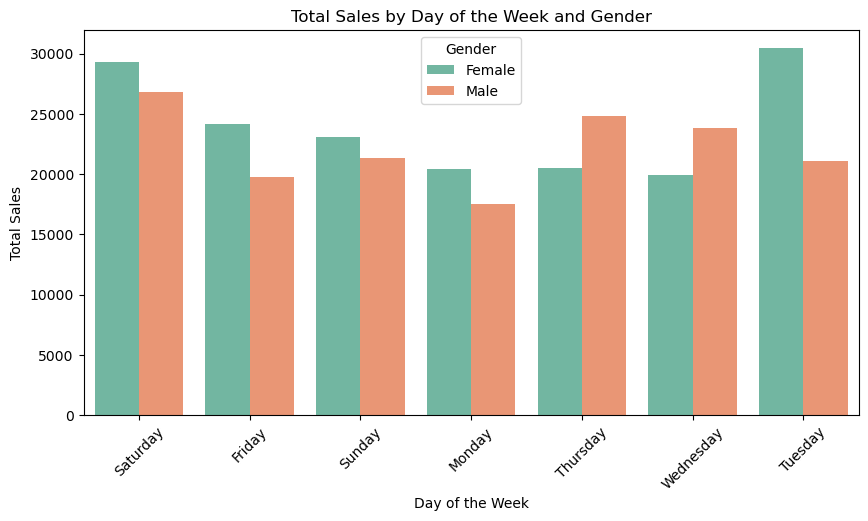

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample DataFrame (replace this with your actual data)
# df = pd.read_csv('your_data.csv')  # Uncomment and use your actual data

# Convert Date to datetime and extract the day name
df["Date"] = pd.to_datetime(df["Date"])
df['Day'] = df['Date'].dt.day_name()

# Assuming 'gender' column exists in the DataFrame
# Group by Day and Gender
sales_by_day_gender = df.groupby(['Day', 'Gender'])['Total'].sum().unstack().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Reset index to make it suitable for seaborn plotting
sales_by_day_gender = sales_by_day_gender.reset_index()

# Plot the barplot with gender distinction and errorbar=None to avoid the deprecated warning
plt.figure(figsize=(10, 5))
sns.barplot(x='Day', y='Total', data=df, hue='Gender', estimator=sum, errorbar=None, palette='Set2')

# Labeling the plot
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales")
plt.title("Total Sales by Day of the Week and Gender")
plt.legend(title="Gender")  # Adding a legend for gender

# Display the plot
plt.xticks(rotation=45)
plt.show()

In [30]:
branch_sales = df.groupby('Branch')['Total'].sum()

In [32]:
print(branch_sales)

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64


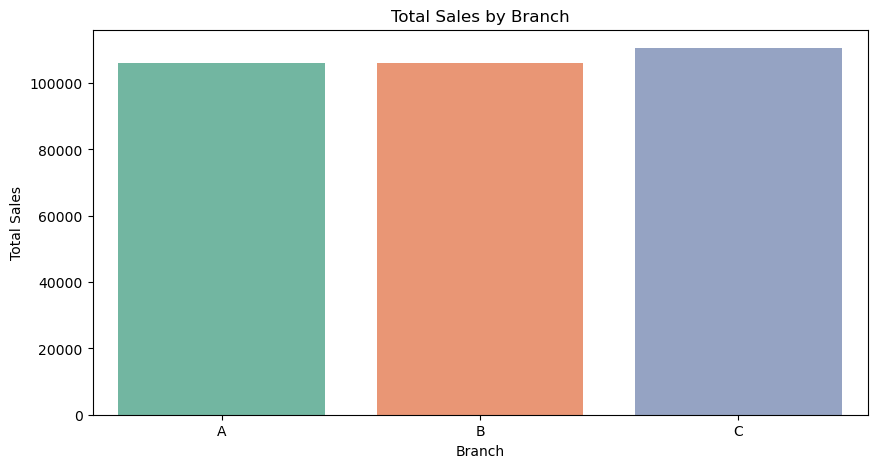

In [35]:
plt.figure(figsize = (10,5))
sns.barplot(x=branch_sales.index, y=branch_sales.values,hue=branch_sales.index, palette = "Set2", legend=False)
plt.xlabel("Branch")
plt.ylabel("Total Sales")
plt.title("Total Sales by Branch")
plt.show()


In [37]:
# Apply 5% tax
df["Tax_5"] = df["Total"] * 0.05  # Adds 5% tax

In [39]:
print(df["Tax_5"])

0      27.448575
1       4.011000
2      17.026275
3      24.452400
4      31.718925
         ...    
995     2.118375
996    51.124500
997     1.671600
998     3.455550
999    32.464950
Name: Tax_5, Length: 1000, dtype: float64


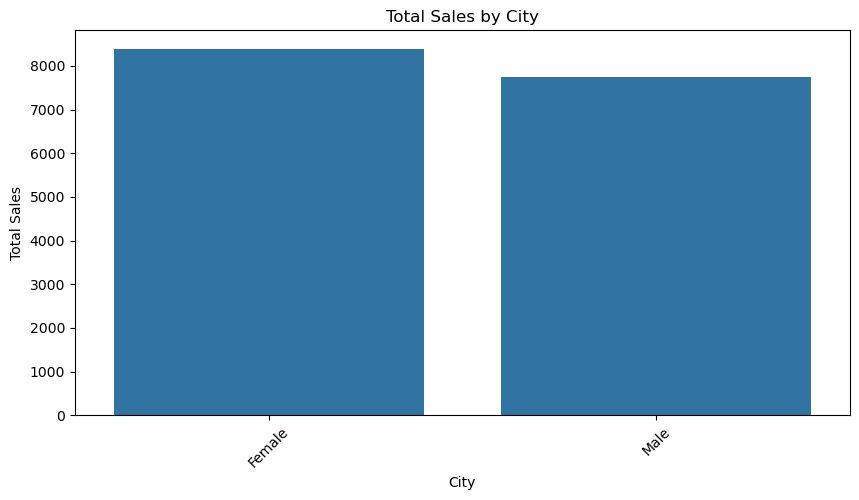

In [41]:
 Gender_tax = df.groupby('Gender')['Tax_5'].sum()

plt.figure(figsize=(10,5))
sns.barplot(x=Gender_tax.index, y=Gender_tax.values)
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.title("Total Sales by City")
plt.xticks(rotation=45)
plt.show()

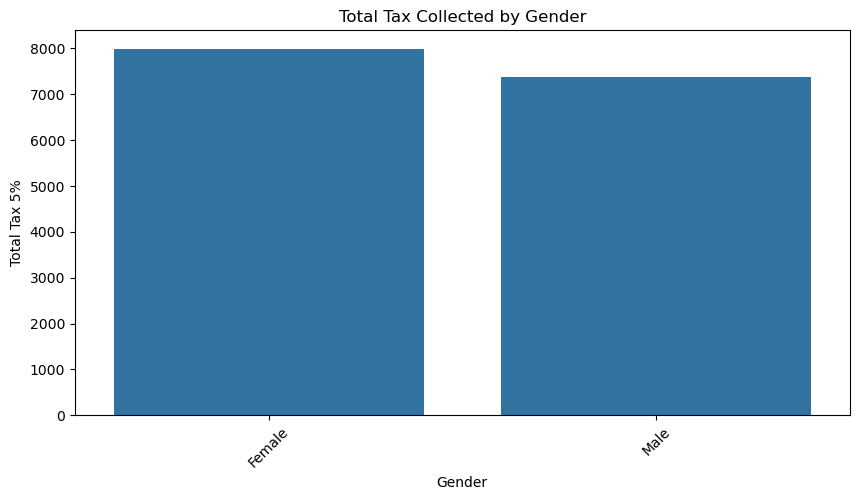

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure columns are correctly formatted
df.columns = df.columns.str.strip()

# Grouping by Gender
Gender_tax = df.groupby('Gender')['Tax 5%'].sum()

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=Gender_tax.index, y=Gender_tax.values)
plt.xlabel("Gender")  # Fixing incorrect label
plt.ylabel("Total Tax 5%")  # Fixing incorrect label
plt.title("Total Tax Collected by Gender")
plt.xticks(rotation=45)
plt.show()

In [46]:
print(df["Tax 5%"])

0      26.1415
1       3.8200
2      16.2155
3      23.2880
4      30.2085
        ...   
995     2.0175
996    48.6900
997     1.5920
998     3.2910
999    30.9190
Name: Tax 5%, Length: 1000, dtype: float64


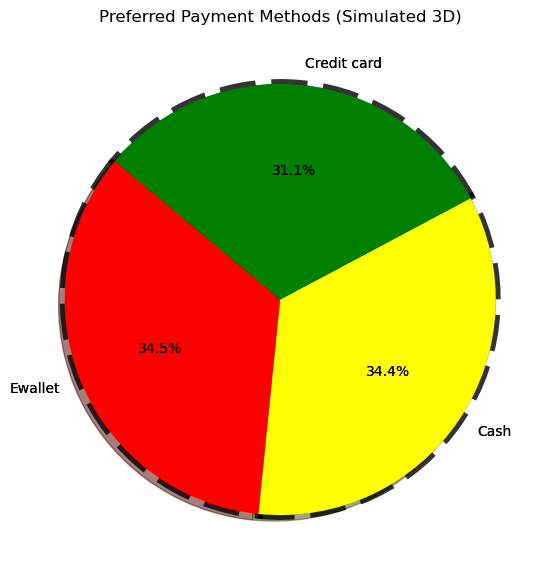

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample Data (Replace with your actual dataset)
payment_counts = df['Payment'].value_counts()

# Create 2D pie chart and set '3D-like' appearance
fig, ax = plt.subplots(figsize=(7, 7))

# Plot the pie chart with a 3D-like effect
ax.pie(payment_counts, 
       labels=payment_counts.index, 
       autopct='%1.1f%%', 
       colors=['orange', 'blue', 'green'], 
       startangle=140, 
       wedgeprops={'edgecolor': 'black', 'linewidth': 7, 'linestyle': '--', 'alpha': 0.8})

# Add shadow for extra 3D feel
ax.pie(payment_counts, 
       labels=payment_counts.index, 
       autopct='%1.1f%%', 
       colors=['Red', 'Yellow', 'green'], 
       startangle=140, 
       shadow=True)

# Set title
plt.title("Preferred Payment Methods (Simulated 3D)")

# Show plot
plt.show()


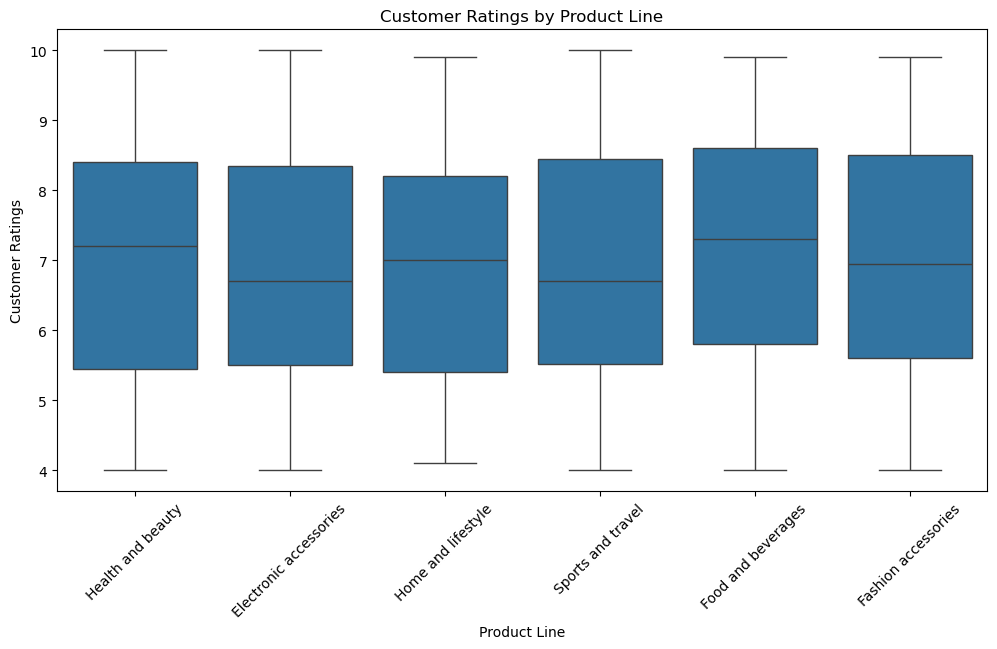

In [53]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Product line'], y=df['Rating'])
plt.xticks(rotation=45)
plt.xlabel("Product Line")
plt.ylabel("Customer Ratings")
plt.title("Customer Ratings by Product Line")
plt.show()



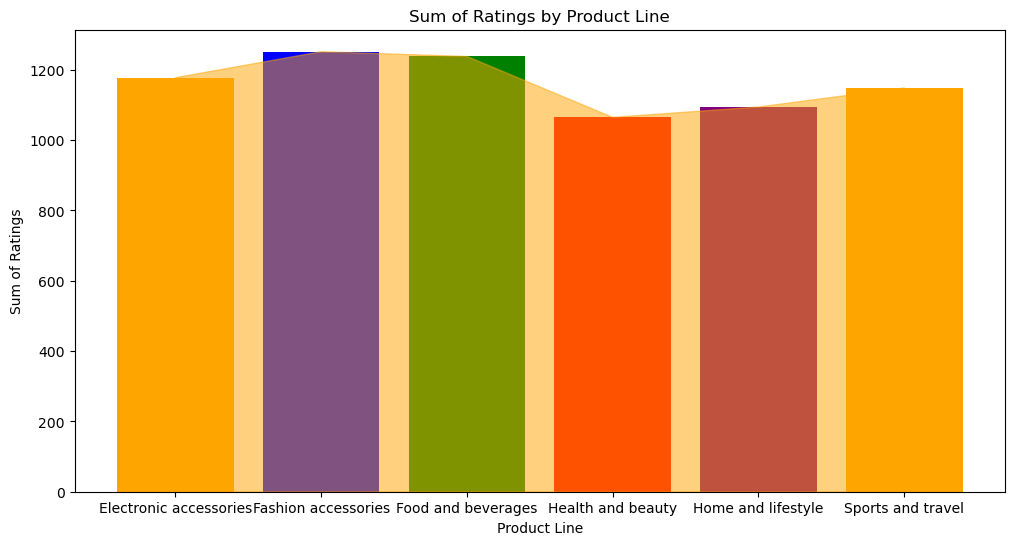

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame
# df = pd.read_csv("your_file.csv")  # Ensure you have the correct DataFrame

# Group by 'Product line' and get the sum of 'Rating' for each product line
grouped_df = df.groupby('Product line')['Rating'].sum()

# Create a simple Stack Plot (since there's only one category, each rating value will be stacked)
plt.figure(figsize=(12, 6))

# Stack plot for the 'Rating' column based on 'Product line'
plt.bar(grouped_df.index, grouped_df.values, color=['orange', 'blue', 'green', 'red', 'purple'])
plt.stackplot(grouped_df.index, grouped_df.values, color=['orange', 'blue', 'green', 'red', 'purple'], alpha=0.5)


# Title and labels
plt.title('Sum of Ratings by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Sum of Ratings')

# Display the plot
plt.show()
